In [72]:
import tensorflow as tf

In [73]:
import  os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [74]:
mnist_images = input_data.read_data_sets("MNIST_data/", one_hot=True)
# training for 100 mnist images
train_pixels , train_list_values = mnist_images.train.next_batch(1000)

# test algorithm for 10 images
test_pixels, test_list_values = mnist_images.train.next_batch(30)

# define tensors for test, train
train_pixel_tensor = tf.placeholder("float", [None, 784])
test_pixel_tensor = tf.placeholder("float", [784])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [75]:
# list of values loaded
pixels, real_values = mnist_images.train.next_batch(10)
print ("list of values loaded ", real_values)

list of values loaded  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


element N 3 of the list plotted


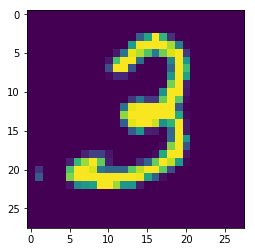

In [76]:
import matplotlib.pyplot as plt
example_to_visualize = 2
print ("element N " + str(example_to_visualize + 1) + " of the list plotted")

image = pixels[example_to_visualize, :]
image = np.reshape(image, [28, 28])
plt.imshow(image)
plt.show()

In [77]:
# cost function
distance = tf.reduce_sum(tf.abs(tf.add(train_pixel_tensor, tf.negative(test_pixel_tensor))), reduction_indices=1)
# minimize distance
prediction = tf.arg_min(distance, 0)
# testing algorithm evaluation
accuracy = 0
init = tf.global_variables_initializer()

In [78]:
# start simulation
with tf.Session() as session:
    session.run(init)
    for i in range(len(test_list_values)):
        nearest_neighbour_index = session.run(prediction,
                                            feed_dict={
                                                train_pixel_tensor: train_pixels,
                                                test_pixel_tensor: test_pixels[i, :]
                                            })

        print ("Test N ", i, "Predicted Class: ", np.argmax(train_list_values[nearest_neighbour_index]), "True Class: ", np.argmax(test_list_values[i]))
        if np.argmax(train_list_values[nearest_neighbour_index]) == np.argmax(test_list_values[i]):
            accuracy += 1. / len(test_pixels)

print ("Result = ", accuracy)

Test N  0 Predicted Class:  9 True Class:  9
Test N  1 Predicted Class:  9 True Class:  9
Test N  2 Predicted Class:  5 True Class:  8
Test N  3 Predicted Class:  3 True Class:  9
Test N  4 Predicted Class:  1 True Class:  1
Test N  5 Predicted Class:  8 True Class:  8
Test N  6 Predicted Class:  5 True Class:  5
Test N  7 Predicted Class:  4 True Class:  4
Test N  8 Predicted Class:  3 True Class:  3
Test N  9 Predicted Class:  1 True Class:  1
Test N  10 Predicted Class:  0 True Class:  0
Test N  11 Predicted Class:  3 True Class:  3
Test N  12 Predicted Class:  3 True Class:  8
Test N  13 Predicted Class:  5 True Class:  5
Test N  14 Predicted Class:  3 True Class:  3
Test N  15 Predicted Class:  6 True Class:  6
Test N  16 Predicted Class:  3 True Class:  3
Test N  17 Predicted Class:  7 True Class:  7
Test N  18 Predicted Class:  7 True Class:  7
Test N  19 Predicted Class:  3 True Class:  3
Test N  20 Predicted Class:  5 True Class:  3
Test N  21 Predicted Class:  6 True Class:  